# Author: Makayla McKibben
## Course: DSC 530 Data Exploration and Analysis
## Date: 09.28.2024
## Week 5
## Exercise 5.2

In [2]:
# Import relevant libraries/modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import thinkstats2
import thinkplot
import warnings
import hinc
from scipy.stats import pareto

In [3]:
# Remove future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

### Activity 5-1

What percentage of the US male population are between 5'10" and 6'1"?

In [6]:
# Create the distribution of male heights from the mean and standard deviation
height_dist = scipy.stats.norm(loc = 178, scale = 7.7)

In [7]:
# Find the percentage of people between the heights give and print it
print(round((height_dist.cdf(185.4) - height_dist.cdf(177.8))*100, 2), "%")

34.21 %


### Activity 5-2

<function matplotlib.pyplot.show(close=None, block=None)>

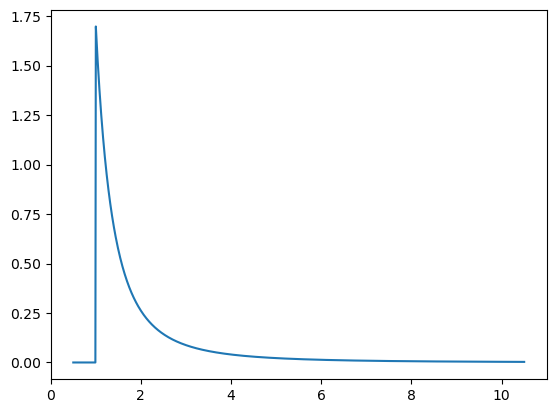

In [9]:
# Plot this distribution.
x = np.linspace(0.5, 10.5, 1000)
output = np.array([pareto.pdf(x, scale = 1, b = 1.7)])
plt.plot(x, output.T)
plt.show

In [10]:
# Create distribution
pareto_dist = scipy.stats.pareto(b = 1.7, scale = 1)

In [11]:
# What is the mean human height in Pareto world?
pareto_dist.mean()

2.428571428571429

In [12]:
# What fraction of the population is shorter than the mean? 
pareto_dist.cdf(pareto_dist.mean())

0.778739697565288

In [13]:
# If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km?
print(round((1 - pareto_dist.cdf(1000))*7e9, 2), "people")

55602.98 people


In [14]:
# How tall do we expect the tallest person to be?
# Calculate, round, and print the distribution value from the probability
print(round(pareto_dist.ppf(1-1 / 7e9), 2), "meters")

618349.61 meters


### Activity 6-1

In [16]:
# Thinkstats2 functions
    
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Mean(xs):
    return RawMoment(xs, 1)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def Var(xs):
    return CentralMoment(xs, 2)

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample



In [17]:
# Get data and take a look at it
income = hinc.ReadData()
income.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [18]:
# Create the sample by raising 10 to the power of the log sample
million_cap_sample = np.power(10, InterpolateSample(income, log_upper = 6.0))
million_cdf = thinkstats2.Cdf(million_cap_sample)

In [19]:
# Round and print the relevant information
print('The mean of the sample with an upper bound of one million is: $', round(Mean(million_cap_sample), 2))
print('The median of the sample with an upper bound of one million is: $', round(Median(million_cap_sample), 2))
print('The skewness of the sample with an upper bound of one million is: ', round(Skewness(million_cap_sample), 2))
print('The Pearson skewness of the sample with an upper bound of one million is: ', round(PearsonMedianSkewness(million_cap_sample), 2))
print('The number of people below the mean of the sample with an upper bound of one million is: ', round(million_cdf.Prob(Mean(million_cap_sample))*100, 2), '%')

The mean of the sample with an upper bound of one million is: $ 74278.71
The median of the sample with an upper bound of one million is: $ 51226.45
The skewness of the sample with an upper bound of one million is:  4.95
The Pearson skewness of the sample with an upper bound of one million is:  0.74
The number of people below the mean of the sample with an upper bound of one million is:  66.0 %


In [20]:
# Create the sample by raising 10 to the power of the log sample
hun_million_sample = np.power(10, InterpolateSample(income, log_upper = 8.0))
hun_million_cdf = thinkstats2.Cdf(hun_million_sample)

In [22]:
# Round and print the relevant information
print('The mean of the sample with an upper bound of one hundred million is: $', round(Mean(hun_million_sample), 2))
print('The median of the sample with an upper bound of one hundred million is: $', round(Median(hun_million_sample), 2))
print('The skewness of the sample with an upper bound of one hundred million is: ', round(Skewness(hun_million_sample), 2))
print('The Pearson median skewness of the sample with an upper bound of one hundred million is: ', round(PearsonMedianSkewness(hun_million_sample), 2))
print('The number of people below the mean of the sample with an upper bound of one hundred million is: ', round(hun_million_cdf.Prob(Mean(hun_million_sample))*100, 2), '%')

The mean of the sample with an upper bound of one hundred million is: $ 457453.49
The median of the sample with an upper bound of one hundred million is: $ 51226.45
The skewness of the sample with an upper bound of one hundred million is:  14.89
The Pearson median skewness of the sample with an upper bound of one hundred million is:  0.27
The number of people below the mean of the sample with an upper bound of one hundred million is:  97.86 %


### How do the data change with a different upper bound?



Because InterpolateSample generates a sample that is equally spaced on a log10 scale, raising the upper bound of income changes the scale pretty drastically. It increases the mean by nearly $400000 and that puts 98% of people below the mean with the increased cap. The median is a good statistic to look at here as it remains unchanged with the cap increase, this tells us that just because the 1% have that much money, it doesn't really impact the average person. Raising the cap increases the skewness but lowers the PearsonMedianSkewness which tells us that maybe the Pearson skewness is not a good statistic for this as we know skewness should increase with an increased cap. 